# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline
import random
import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [2]:
env = gym.make('CliffWalking-v0')

/home/pemfir/anaconda3/envs/deep_rl/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

notice that 
next_state, reward, done, info = env.step(action). Here done = False as long as we have not reached state 47 in which case the episode ends. unless you are on a cliff, if you make a move forcing you outside of the grid, e.g., moving to the laft or up when in state 0, then you will not move and remain in state 0. 

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

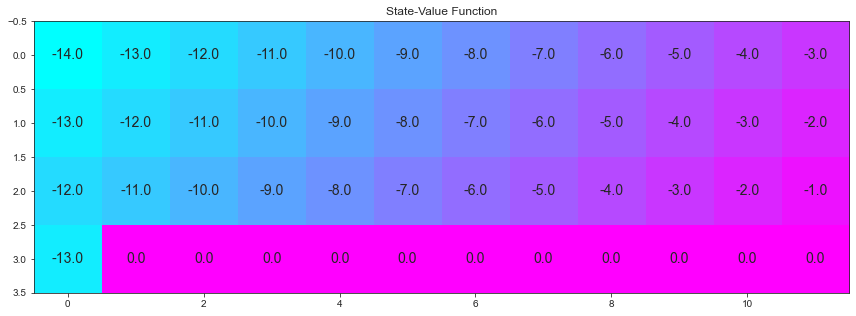

In [4]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [5]:
action_map = {0 : 'UP' , 1 : 'RIGHT' , 2 : "DOWN", 3 : "LEFT"}


state = env.reset()
print("initial state", state)
while True:
    action = random.randrange(4)
    next_state, reward, done, info = env.step(action)
    print("action", action_map[action])
    print(next_state, reward, done, info)
    if done:
        break



initial state 36
action LEFT
36 -1 False {'prob': 1.0}
action DOWN
36 -1 False {'prob': 1.0}
action RIGHT
36 -100 False {'prob': 1.0}
action UP
24 -1 False {'prob': 1.0}
action UP
12 -1 False {'prob': 1.0}
action RIGHT
13 -1 False {'prob': 1.0}
action UP
1 -1 False {'prob': 1.0}
action UP
1 -1 False {'prob': 1.0}
action RIGHT
2 -1 False {'prob': 1.0}
action LEFT
1 -1 False {'prob': 1.0}
action LEFT
0 -1 False {'prob': 1.0}
action RIGHT
1 -1 False {'prob': 1.0}
action LEFT
0 -1 False {'prob': 1.0}
action UP
0 -1 False {'prob': 1.0}
action RIGHT
1 -1 False {'prob': 1.0}
action RIGHT
2 -1 False {'prob': 1.0}
action LEFT
1 -1 False {'prob': 1.0}
action DOWN
13 -1 False {'prob': 1.0}
action DOWN
25 -1 False {'prob': 1.0}
action LEFT
24 -1 False {'prob': 1.0}
action RIGHT
25 -1 False {'prob': 1.0}
action UP
13 -1 False {'prob': 1.0}
action LEFT
12 -1 False {'prob': 1.0}
action DOWN
24 -1 False {'prob': 1.0}
action DOWN
36 -1 False {'prob': 1.0}
action UP
24 -1 False {'prob': 1.0}
action LEFT

2 -1 False {'prob': 1.0}
action UP
2 -1 False {'prob': 1.0}
action LEFT
1 -1 False {'prob': 1.0}
action DOWN
13 -1 False {'prob': 1.0}
action UP
1 -1 False {'prob': 1.0}
action DOWN
13 -1 False {'prob': 1.0}
action LEFT
12 -1 False {'prob': 1.0}
action DOWN
24 -1 False {'prob': 1.0}
action UP
12 -1 False {'prob': 1.0}
action DOWN
24 -1 False {'prob': 1.0}
action UP
12 -1 False {'prob': 1.0}
action DOWN
24 -1 False {'prob': 1.0}
action LEFT
24 -1 False {'prob': 1.0}
action DOWN
36 -1 False {'prob': 1.0}
action DOWN
36 -1 False {'prob': 1.0}
action RIGHT
36 -100 False {'prob': 1.0}
action DOWN
36 -1 False {'prob': 1.0}
action RIGHT
36 -100 False {'prob': 1.0}
action RIGHT
36 -100 False {'prob': 1.0}
action DOWN
36 -1 False {'prob': 1.0}
action RIGHT
36 -100 False {'prob': 1.0}
action UP
24 -1 False {'prob': 1.0}
action UP
12 -1 False {'prob': 1.0}
action DOWN
24 -1 False {'prob': 1.0}
action LEFT
24 -1 False {'prob': 1.0}
action RIGHT
25 -1 False {'prob': 1.0}
action LEFT
24 -1 False {'p

In [6]:
def generate_action(state, Q, epsilon, number_of_action):
    if np.random.random() <= epsilon:
        action = random.randrange(number_of_action)
    else:
        action = np.argmax(Q[state])
    return action



def sarsa(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99, eps_min=0.05, plot_every=100):
    # initialize action-value function (empty dictionary of arrays)
    number_of_action = env.nA
    epsilon = eps_start
    Q = defaultdict(lambda: np.zeros(number_of_action))
    # initialize performance monitor
    tmp_scores = deque(maxlen=plot_every)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        state = env.reset()
        action = generate_action(state, Q, epsilon, number_of_action) 
        
        score = 0 
        
        while True:
            next_state, reward, done, info = env.step(action)
            score += reward
            if not done:
                next_action = generate_action(next_state, Q, epsilon, number_of_action)
                # keep track of rewards in the episode 
#                 epsilon = max(epsilon*eps_decay, eps_min)
                epsilon = 1.0 / i_episode 
                Qsa_next = Q[next_state][next_action] 
                Q[state][action] += alpha*(reward + gamma*Qsa_next - Q[state][action])
            
            
                state = next_state
                action = next_action
            
            if done:
                # this means you reached the end state. The last action you did, took you to the end state 47 
                # state = state before the end state
                # next_state = 47
                # action that got you to 47 
                # There is no next state and Q function of the reward state is same as the reward you recieve in that state
                Qsa_next = 0
                Q[state][action] += alpha*(reward + gamma*Qsa_next - Q[state][action])
                # adding the total accumulated reward as 1 element of a list to the tmp_scores
                tmp_scores.append(score)
                break 
                
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
        
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))  
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

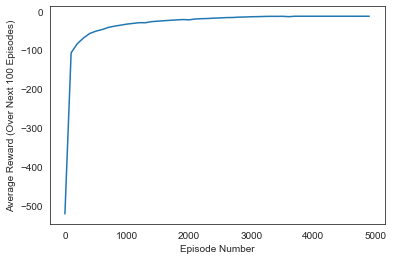

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  0  3  1  2  3  3  2  2  1  2  2]
 [ 1  1  1  0  1  1  3  1  2  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


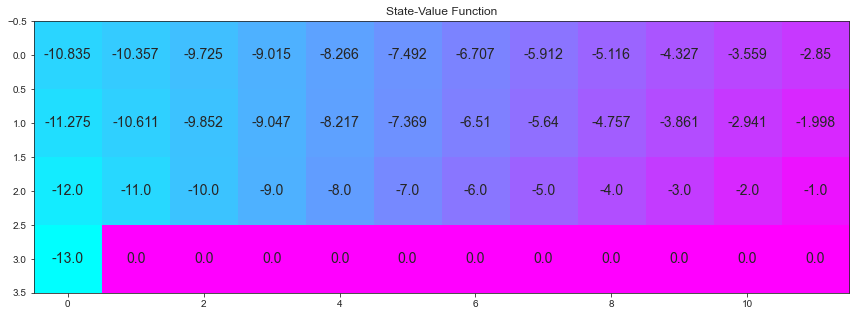

In [7]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 5000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [8]:
Q_sarsamax[1]

NameError: name 'Q_sarsamax' is not defined

In [9]:
np.argmax(Q_sarsamax[1])

NameError: name 'Q_sarsamax' is not defined

In [10]:
def q_learning(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99, eps_min=0.05, plot_every=100):
    # initialize action-value function (empty dictionary of arrays)
    number_of_action = env.nA
    epsilon = eps_start
    Q = defaultdict(lambda: np.zeros(number_of_action))
    # initialize performance monitor
    tmp_scores = deque(maxlen=plot_every)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        state = env.reset()
        action = generate_action(state, Q, epsilon, number_of_action) 
        score = 0 
        
        while True:
            
            next_state, reward, done, info = env.step(action)
            score += reward
            if not done:
                # notice there is no next_action. actions in this method are all based on epsilon greedy
                epsilon = 1.0 / i_episode 
                Qsa_next = np.max(Q[next_state])
                Q[state][action] += alpha*(reward + gamma*Qsa_next - Q[state][action])
                
                # action for next round. 
                action = generate_action(next_state, Q, epsilon, number_of_action)
            
                state = next_state
#                 action = next_action
            
            if done:
                # this means you reached the end state. The last action you did, took you to the end state 47 
                # state = state before the end state
                # next_state = 47
                # action that got you to 47 
                # There is no next state and Q function of the reward state is same as the reward you recieve in that state
                Qsa_next = 0
                Q[state][action] += alpha*(reward + gamma*Qsa_next - Q[state][action])
                # adding the total accumulated reward as 1 element of a list to the tmp_scores
                tmp_scores.append(score)
                break 
                
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
        
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))  
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

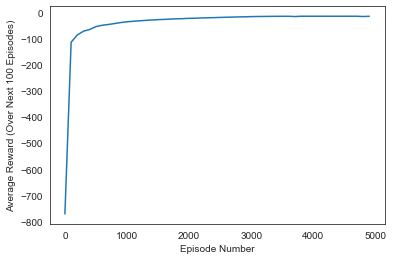

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 2  0  3  2  0  2  0  0  3  2  2  0]
 [ 2  3  2  1  1  1  1  1  1  1  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


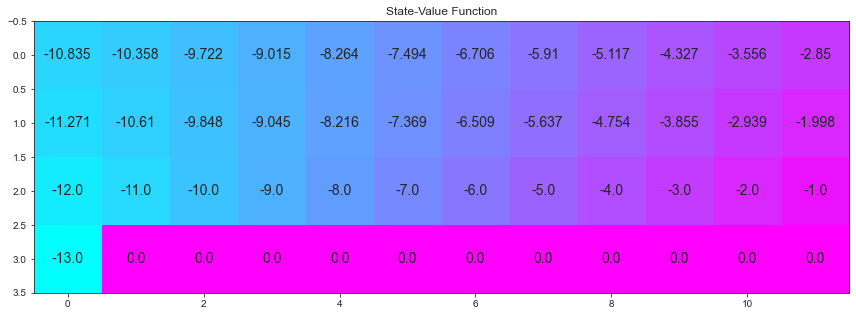

In [11]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [12]:
def compute_action_probabilities(q_values, epsilon, number_of_action):
    probabilities = np.ones(number_of_action)*epsilon/number_of_actionstates
    probabilities[np.argmax(q_values)] += 1 - epsilon
    return probabilities

In [13]:
np.dot([.1, .2, .3, .4], compute_action_probabilities([.1, .2, .3, .4], 0.04, 4))

NameError: name 'number_of_actionstates' is not defined

In [14]:
def compute_action_probabilities(q_values, epsilon, number_of_action):
    
    probabilities = np.ones(number_of_action)*epsilon/number_of_action
    probabilities[np.argmax(q_values)] += 1 - epsilon
    return probabilities
    

def expected_sarsa(env, num_episodes, alpha, gamma=1.0, eps_start=.003, eps_decay=.99, eps_min=0.05, plot_every=100):
    # initialize action-value function (empty dictionary of arrays)
    number_of_action = env.nA
    epsilon = eps_start
    Q = defaultdict(lambda: np.zeros(number_of_action))
    # initialize performance monitor
    tmp_scores = deque(maxlen=plot_every)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        state = env.reset()
        action = generate_action(state, Q, epsilon, number_of_action) 
        score = 0 
        
        while True:
            
            next_state, reward, done, info = env.step(action)
            score += reward
            if not done:
                # notice there is no next_action. actions in this method are all based on epsilon greedy
#                 epsilon = 1.0 / i_episode 
                action_probabilities = compute_action_probabilities(Q[next_state], epsilon, number_of_action)
                Qsa_next = np.sum(np.dot(action_probabilities, Q[next_state]))
                Q[state][action] += alpha*(reward + gamma*Qsa_next - Q[state][action])
                
                # action for next round. 
                action = generate_action(next_state, Q, epsilon, number_of_action)
            
                state = next_state
#                 action = next_action
            
            if done:
                # this means you reached the end state. The last action you did, took you to the end state 47 
                # state = state before the end state
                # next_state = 47
                # action that got you to 47 
                # There is no next state and Q function of the reward state is same as the reward you recieve in that state
                Qsa_next = 0
                Q[state][action] += alpha*(reward + gamma*Qsa_next - Q[state][action])
                # adding the total accumulated reward as 1 element of a list to the tmp_scores
                tmp_scores.append(score)
                break 
                
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
        
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))  
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

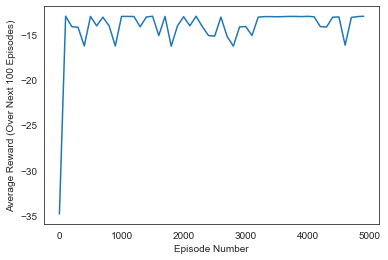

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  1  1  2  1  1  3]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


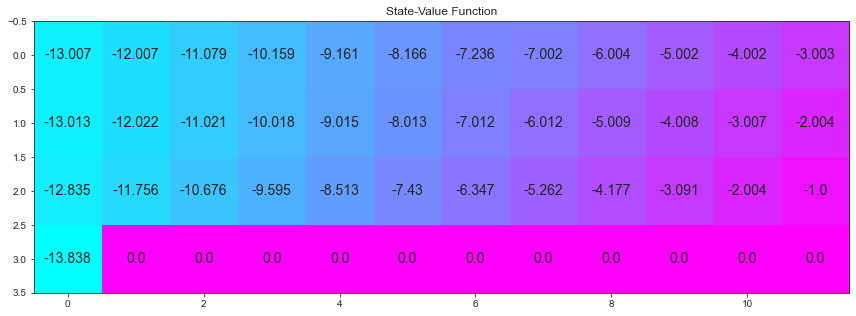

In [15]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 5000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])